<a href="https://colab.research.google.com/github/andrebjardim/python-scripts/blob/main/nobel-prize-analysis/Nobel_Prize_Winners_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nobel Prize Data Analysis (1901–2023)

The Nobel Prize, established by Alfred Nobel in 1896, has been awarded annually since 1901 in fields like chemistry, literature, physics, medicine, economics, and peace. Winners receive not only prestige and prize money but also a gold medal bearing Nobel’s likeness.

This project explores a dataset of Nobel laureates from 1901 to 2023, sourced from the official Nobel Prize API. Using Python and pandas, I analyze trends such as gender distribution, country of origin, and repeat winners. Along the way, I’ll answer key questions and uncover interesting patterns in this historic data.

## Load and Prepare the Dataset

In [19]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
nobel = pd.read_csv('https://raw.githubusercontent.com/andrebjardim/python-scripts/main/nobel-prize-analysis/data/nobel.csv')

## Most Common Gender and Country of Birth

In [20]:
# Most common gender and birth country
top_gender = nobel['sex'].value_counts().index[0]
top_country = nobel['birth_country'].value_counts().index[0]

print("Most common gender among Nobel laureates:", top_gender)
print("Most common country of birth:", top_country)

Most common gender among Nobel laureates: Male
Most common country of birth: United States of America


## Decade with the Highest Ratio of US-born Winners

Decade with highest ratio of US-born Nobel winners: 2000


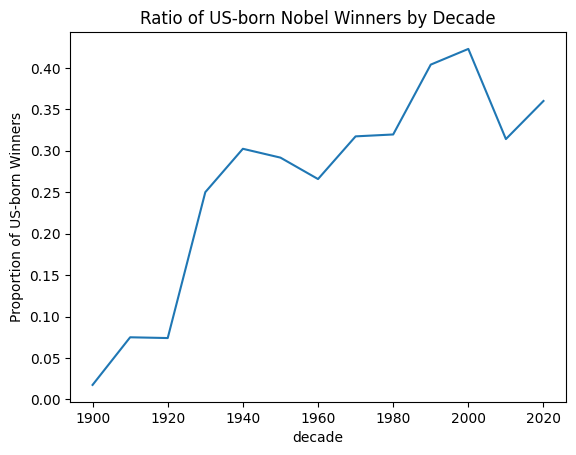

In [21]:
# Add derived columns
nobel['us_born_winners'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)

# Group and analyze
us_winners_by_decade = nobel.groupby('decade', as_index=False)['us_born_winners'].mean()
max_decade_usa = us_winners_by_decade[us_winners_by_decade['us_born_winners'] == us_winners_by_decade['us_born_winners'].max()]['decade'].values[0]

print("Decade with highest ratio of US-born Nobel winners:", max_decade_usa)

# Plotting US-born Nobel Winners by Decade
sns.lineplot(data=us_winners_by_decade, x='decade', y='us_born_winners')
plt.title("Ratio of US-born Nobel Winners by Decade")
plt.ylabel("Proportion of US-born Winners")
plt.show()

## Female Representation by Decade and Category

In [22]:
# Add column to identify female winners
nobel['female_winner'] = nobel['sex'] == 'Female'

# Group by decade and category
female_ratio = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
max_female_row = female_ratio[female_ratio['female_winner'] == female_ratio['female_winner'].max()]
max_female_dict = {
    int(max_female_row['decade'].values[0]): max_female_row['category'].values[0]
}

print("Decade and category with the highest proportion of female winners:")
print(max_female_dict)

Decade and category with the highest proportion of female winners:
{2020: 'Literature'}


## First Woman to Win a Nobel Prize

In [23]:
# Filter for female winners and find the first
female_winners = nobel[nobel['female_winner']]
earliest_female = female_winners.sort_values('year').iloc[0]
first_woman_name = earliest_female['full_name']
first_woman_category = earliest_female['category']

print("First woman to win a Nobel Prize:", first_woman_name)
print("Category:", first_woman_category)

First woman to win a Nobel Prize: Marie Curie, née Sklodowska
Category: Physics


## Repeat Nobel Prize Winners

In [24]:
# Count and filter names that appear more than once
counts = nobel['full_name'].value_counts()
repeat_list = list(counts[counts >= 2].index)

print("Repeat Nobel Prize winners:")
print(repeat_list)

Repeat Nobel Prize winners:
['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'Marie Curie, née Sklodowska', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger']


## Conclusion

In this analysis of Nobel Prize winners from 1901 to 2023, we found several interesting patterns:

- The most common gender among laureates is **Male**, with the United States being the most common country of birth.
- The decade with the highest ratio of US-born winners was the **2000s**.
- The highest proportion of female winners appeared in the **2020s**, particularly in the **Literature** category.
- The first woman to win a Nobel Prize was **Marie Curie** in Physics.
- Several laureates have won the Nobel Prize multiple times, including notable names like Marie Curie and Linus Pauling.

This dataset highlights evolving trends in Nobel Prize awards, especially increased female representation in recent decades.
